In [2]:
import pandas as pd
dataset = pd.read_csv('df_news_spanish_covid.csv')
dataset = dataset.sample(frac=1)

#dataset = pd.read_excel ('Constraint_Train.xlsx')


#Show the dataset information 
dataset.info()
dataset.isnull()
print(dataset.shape)
dataset



<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 123 to 93
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          237 non-null    int64 
 1   CATEGORY    237 non-null    int64 
 2   TOPICS      237 non-null    object
 3   SOURCE      232 non-null    object
 4   HEADLINE    237 non-null    object
 5   TEXT        237 non-null    object
 6   LINK        234 non-null    object
 7   Unnamed: 7  3 non-null      object
dtypes: int64(2), object(6)
memory usage: 16.7+ KB
(237, 8)


,ID,CATEGORY,TOPICS,SOURCE,HEADLINE,TEXT,LINK,Unnamed: 7
123,299,0,Covid-19,AFPFactual,55 personas mueren en EEUU tras recibir la vac...,Al menos 55 personas mueren en EE.UU. tras rec...,https://www.hispantv.com/Noticia/salud/485847/...,NaN
36,100,1,Covid-19,El Tiempo,Uso de plasma disminuye hospitalización en pac...,Así lo reveló el estudio en el que participaro...,https://www.eltiempo.com/colombia/medellin/uso...,NaN
179,416,0,Covid-19,AFPFactual,Resolucion del Consejo de Europa sobre las Vac...,Resolucion del Consejo de Europa sobre las Vac...,https://www.facebook.com/586293665575278/posts...,NaN
221,529,1,Covid-19,Xataka,Alguien dice vender la vacuna de Pfizer contra...,Desafortunadamente no era tan difícil prever q...,https://www.xataka.com.mx/medicina-y-salud/alg...,NaN
49,134,0,Covid-19,AFPFactual,El ABUSO DE MASCARILLAS CAUSA HIPOXIA,El uso prolongado de la mascarilla produce hip...,Perma |,NaN
...,...,...,...,...,...,...,...,...
151,365,0,Covid-19,La voz del pueblo 920 am,Por cada 100 habitantes en Ibagué hay 11 conta...,El municipio hace parte del top 10 a nivel paí...,https://www.lavozdelpueblo920am.com/ibague/567...,NaN
67,166,0,Covid-19,Mallorca Diario,Polémica por la relación de Leire Pajín con el...,Fuerte polémica en redes sociales tras conocer...,https://www.mallorcadiario.com/leire-pajin-ase...,NaN
156,376,0,Covid-19,AFPFactual,¿El eucalipto podría combatir el COVID19?,¿El eucalipto podría combatir el COVID19?\n\nM...,Perma | Canal 7 Salta - #SaludNatural ¿El euca...,NaN
105,248,0,Covid-19,Agencia EFE,Google está instalando secretamente una aplica...,Google está instalando secretamente una aplica...,https://twitter.com/FotografoGus1/status/12673...,NaN


In [3]:
#renomando a coluna classe e texto
df_dataset = dataset.rename(columns={'CATEGORY': 'classe'})
df_dataset

,ID,classe,TOPICS,SOURCE,HEADLINE,TEXT,LINK,Unnamed: 7
123,299,0,Covid-19,AFPFactual,55 personas mueren en EEUU tras recibir la vac...,Al menos 55 personas mueren en EE.UU. tras rec...,https://www.hispantv.com/Noticia/salud/485847/...,NaN
36,100,1,Covid-19,El Tiempo,Uso de plasma disminuye hospitalización en pac...,Así lo reveló el estudio en el que participaro...,https://www.eltiempo.com/colombia/medellin/uso...,NaN
179,416,0,Covid-19,AFPFactual,Resolucion del Consejo de Europa sobre las Vac...,Resolucion del Consejo de Europa sobre las Vac...,https://www.facebook.com/586293665575278/posts...,NaN
221,529,1,Covid-19,Xataka,Alguien dice vender la vacuna de Pfizer contra...,Desafortunadamente no era tan difícil prever q...,https://www.xataka.com.mx/medicina-y-salud/alg...,NaN
49,134,0,Covid-19,AFPFactual,El ABUSO DE MASCARILLAS CAUSA HIPOXIA,El uso prolongado de la mascarilla produce hip...,Perma |,NaN
...,...,...,...,...,...,...,...,...
151,365,0,Covid-19,La voz del pueblo 920 am,Por cada 100 habitantes en Ibagué hay 11 conta...,El municipio hace parte del top 10 a nivel paí...,https://www.lavozdelpueblo920am.com/ibague/567...,NaN
67,166,0,Covid-19,Mallorca Diario,Polémica por la relación de Leire Pajín con el...,Fuerte polémica en redes sociales tras conocer...,https://www.mallorcadiario.com/leire-pajin-ase...,NaN
156,376,0,Covid-19,AFPFactual,¿El eucalipto podría combatir el COVID19?,¿El eucalipto podría combatir el COVID19?\n\nM...,Perma | Canal 7 Salta - #SaludNatural ¿El euca...,NaN
105,248,0,Covid-19,Agencia EFE,Google está instalando secretamente una aplica...,Google está instalando secretamente una aplica...,https://twitter.com/FotografoGus1/status/12673...,NaN


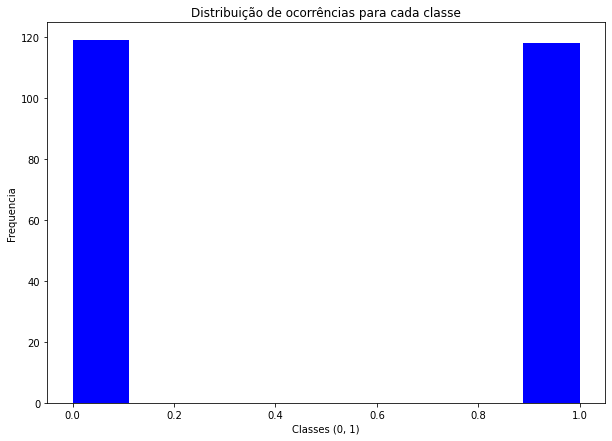

0    119
1    118
Name: classe, dtype: int64

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7)) 
x = df_dataset ['classe'] 
plt.hist(x, bins = 'auto', color = "blue") 
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (0, 1)')
plt.show()
#-----------------------------------------------------------
df_dataset ['classe'].value_counts()

In [5]:
#undersampling - deleting samples from the majority class
classe_0 = df_dataset [df_dataset .classe == 0]
classe_1 = df_dataset [df_dataset .classe == 1]


#Obtaining the less representative sample
sample_0 = classe_0.sample(n=118, replace=True)

#Concatenating new data with LESS representativeness into the initial dataset.
df_dataset_undersampling = pd.concat([classe_1, sample_0])

print(df_dataset_undersampling['classe'].value_counts())


1    118
0    118
Name: classe, dtype: int64


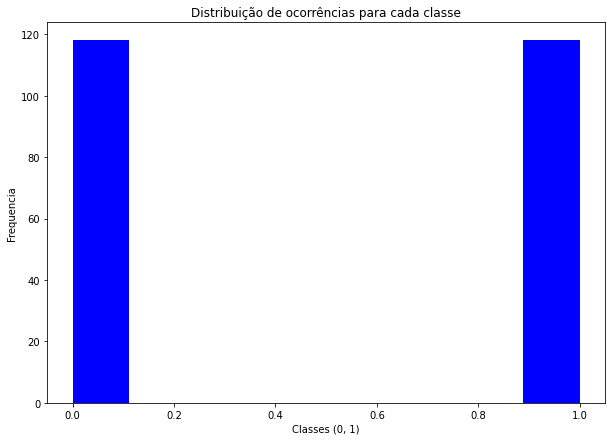

1    118
0    118
Name: classe, dtype: int64

In [6]:
#Balanced dataset
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7)) 
x = df_dataset_undersampling ['classe'] 
plt.hist(x, bins = 'auto', color = "blue") 
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (0, 1)')
plt.show()

df_dataset_undersampling ['classe'].value_counts()

In [7]:
!pip install ktrain
import keras
import ktrain
from ktrain import text

In [8]:
#fasttext
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df_dataset_undersampling, 
                                                                   'TEXT',
                                                                   label_columns='classe',
                                                                   maxlen=64, 
                                                                   max_features=5000,
                                                                   preprocess_mode='standard',
                                                                   lang=None,
                                                                   ngram_range=1,
                                                                   val_pct = 0.1,
                                                                   )

['not_classe', 'classe']
     not_classe  classe
34          0.0     1.0
166         0.0     1.0
36          0.0     1.0
27          1.0     0.0
136         1.0     0.0
['not_classe', 'classe']
     not_classe  classe
121         1.0     0.0
135         1.0     0.0
17          1.0     0.0
83          1.0     0.0
123         1.0     0.0
language: es
Word Counts: 12243
Nrows: 212
212 train sequences
train sequence lengths:
	mean : 451
	95percentile : 1027
	99percentile : 1765
x_train shape: (212,64)
y_train shape: (212, 2)
Is Multi-Label? False
24 test sequences
test sequence lengths:
	mean : 450
	95percentile : 967
	99percentile : 1719
x_test shape: (24,64)
y_test shape: (24, 2)


In [77]:
#fasttext classifier
model = text.text_classifier('fasttext', (x_train, y_train) , preproc=preproc)
classifier = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test)
                             )

Is Multi-Label? False
compiling word ID features...
maxlen is 64
done.


In [80]:
#fasttext classifier
classifier.fit_onecycle(0.01,5)



begin training using onecycle policy with max lr of 0.01...
Epoch 1/5
7/7 [==============================] - 0s 15ms/step - loss: 0.4080 - accuracy: 0.8302 - val_loss: 0.6904 - val_accuracy: 0.3333
Epoch 2/5
7/7 [==============================] - 0s 12ms/step - loss: 0.3846 - accuracy: 0.8443 - val_loss: 0.6745 - val_accuracy: 0.6667
Epoch 3/5
7/7 [==============================] - 0s 11ms/step - loss: 0.2430 - accuracy: 0.9104 - val_loss: 0.6498 - val_accuracy: 0.7083
Epoch 4/5
7/7 [==============================] - 0s 10ms/step - loss: 0.1990 - accuracy: 0.9245 - val_loss: 0.6457 - val_accuracy: 0.7917
Epoch 5/5
7/7 [==============================] - 0s 11ms/step - loss: 0.1413 - accuracy: 0.9528 - val_loss: 0.6477 - val_accuracy: 0.7083


In [81]:
classifier.validate()

              precision    recall  f1-score   support

           0       1.00      0.56      0.72        16
           1       0.53      1.00      0.70         8

    accuracy                           0.71        24
   macro avg       0.77      0.78      0.71        24
weighted avg       0.84      0.71      0.71        24



array([[9, 7],
       [0, 8]])

In [9]:
#bert
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df_dataset_undersampling, 
                                                                   'TEXT',
                                                                   label_columns='classe',
                                                                   maxlen=64, 
                                                                   max_features=5000,
                                                                   preprocess_mode='bert',
                                                                   lang=None,
                                                                   val_pct = 0.1,
                                                                   )

['not_classe', 'classe']
     not_classe  classe
216         0.0     1.0
103         1.0     0.0
125         1.0     0.0
62          0.0     1.0
213         0.0     1.0
['not_classe', 'classe']
     not_classe  classe
56          0.0     1.0
52          1.0     0.0
127         0.0     1.0
50          0.0     1.0
6           0.0     1.0
preprocessing train...
language: es


Is Multi-Label? False
preprocessing test...
language: es


In [10]:
#bert classifier
model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)
classifier = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=64
                             )

Is Multi-Label? False
maxlen is 64
done.


In [11]:
#Bert Classifier
classifier.fit_onecycle(0.00002,1)



begin training using onecycle policy with max lr of 2e-05...
4/4 [==============================] - 163s 33s/step - loss: 0.6939 - accuracy: 0.5189 - val_loss: 0.7707 - val_accuracy: 0.4167


In [84]:
classifier.validate()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.39      0.90      0.55        10

    accuracy                           0.38        24
   macro avg       0.20      0.45      0.27        24
weighted avg       0.16      0.38      0.23        24



array([[ 0, 14],
       [ 1,  9]])